In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# mnist is dataset of greyscale images of handwritten digits
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

In [5]:
# x_train[0]    # two dimesional array of gretscale image

<Figure size 200x200 with 0 Axes>

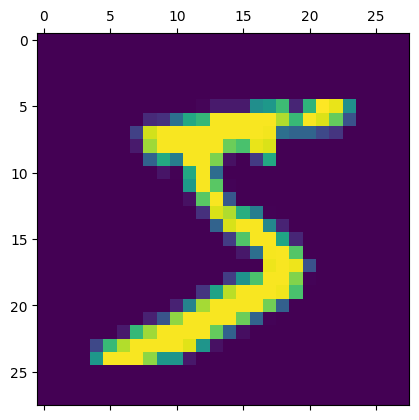

In [6]:
plt.figure(figsize=(2,2))
plt.matshow(x_train[0])

In [7]:
# need to reshape each image greyscale values into 1d array
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [8]:
x_train.shape # 28 x 28 2d array

(60000, 28, 28)

In [9]:
x_train_flattened.shape  # 784 1d array

(60000, 784)

In [10]:
# sequneital helps build layer by layer for deep learning model in linear way where each layer has one input and other output
# helps in feelforward neural  network  without any cycles or loops
# here sequential model requires input of each layer must match the output of previous layer

# keras.Sequential([
#     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')   # here we created only 2 layer model ... 
#                                             # 1 input wiht 784 neurons and 2 output with 10
# ]
    
# )
from keras.models import Sequential
from keras.layers import Dense
# create a model object
model  = Sequential()
# add layer
model.add(Dense(10,input_shape = (784,),activation = 'sigmoid'))
# compile model
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.fit(x_train_flattened,y_train,epochs=5)  # epochs number of iterations it train by spliting train data

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7765 - loss: 17.2071
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8793 - loss: 6.1226
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8838 - loss: 5.5232
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8870 - loss: 5.4534
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8869 - loss: 5.2835


In [12]:
# its accuracy still not very good,so we need to scale data
x_train = x_train / 255
x_test = x_test / 255 # scale _> using one method is to convert values in array to 0 to 1 range

In [13]:
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)
x_test_flattened = x_test.reshape(len(x_test), 28* 28)

In [14]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7700 - loss: 1.4054
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8637 - loss: 0.9808
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8820 - loss: 0.6728
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8977 - loss: 0.4766
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9042 - loss: 0.3763


IN above ,we can observe difference in accuracy before and after scaling input

In [15]:
# we need to evaluate model before predicting
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8979 - loss: 0.3654


[0.3194352686405182, 0.9139000177383423]

In [16]:
y_predict = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step


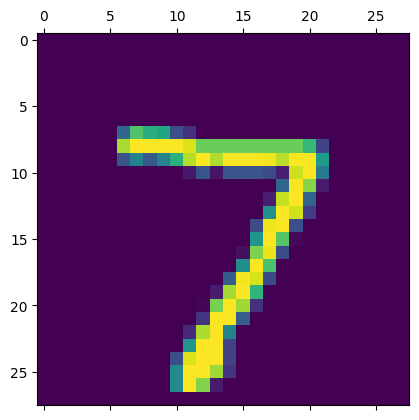

In [17]:
plt.matshow(x_test[0])

In [18]:
# now check output what it predicted
y_predict[0] # each output has 10 values because our output layer has 10 neurons

array([3.0168376e-03, 2.9888228e-04, 9.2988089e-02, 7.4155885e-01,
       6.2185712e-02, 1.8110080e-01, 4.5028869e-06, 9.9888158e-01,
       1.4840472e-01, 7.9861861e-01], dtype=float32)

In [19]:
# argmax returns the index of highest value
np.argmax(y_predict[0])

7

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
# before we need to convert y_predict same as integers like in y_test
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
# now to check where our model predicted wrong
# we use confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    1,    0,    5,   11,    1,    3,    0],
       [   0, 1109,    2,    2,    0,    2,    4,    1,   15,    0],
       [  11,   11,  891,   24,   15,    0,   13,   17,   45,    5],
       [   3,    2,   20,  912,    1,   24,    4,   15,   18,   11],
       [   1,    3,    3,    1,  910,    0,   13,    2,    7,   42],
       [  11,    5,    1,   39,   13,  757,   19,    9,   27,   11],
       [   6,    3,    5,    1,    7,   14,  918,    1,    3,    0],
       [   2,   13,   23,    4,    9,    0,    1,  937,    3,   36],
       [   5,   11,    8,   24,   11,   25,   11,   12,  851,   16],
       [  10,    9,    3,   13,   42,    7,    0,   21,    8,  896]])>

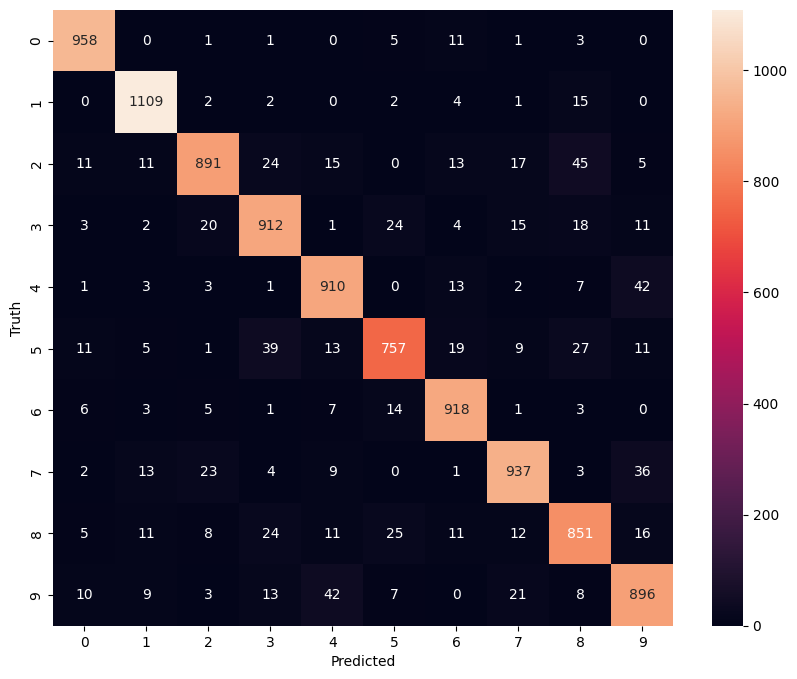

In [23]:
# use seaborn (cm,
import seaborn as sns

def plot_heatmap(x):
    plt.figure(figsize=(10,8))
    sns.heatmap(x,annot=True,fmt='d')   # annot used to show data values as labels
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    
plot_heatmap(cm)

In [24]:
# now to improve we add one hidden layer in model
model2 = Sequential()
model2.add(Dense(100,input_shape=(784,),activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model2.fit(x_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8365 - loss: 0.6986
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9387 - loss: 0.2190
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9549 - loss: 0.1539
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9663 - loss: 0.1195
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9720 - loss: 0.0984


In [26]:
# its accuracy increased as we added another layer
model2.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1134


[0.10214292258024216, 0.970300018787384]

In [27]:
y_predict = model2.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
y_predict_labels = [np.argmax(i) for i in y_predict]


In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

Text(45.722222222222214, 0.5, 'Truth')

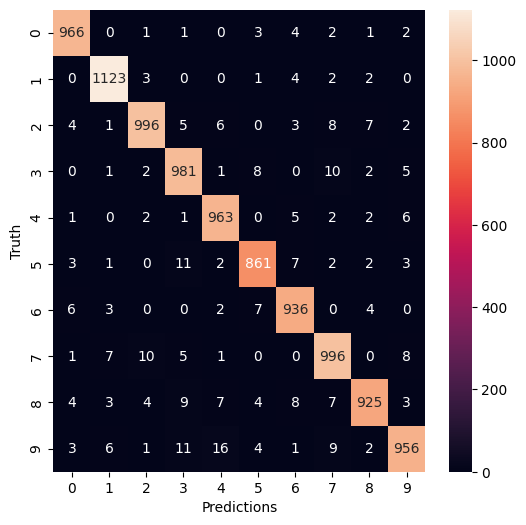

In [30]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot = True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [31]:
# we need not to pass flatten array as input
model3 = Sequential()

# flatten input
model3.add(keras.layers.Flatten(input_shape = (28,28)))
model3.add(Dense(350,activation='sigmoid'))
model3.add(Dense(100,activation = 'sigmoid'))
model3.add(Dense(10,activation='sigmoid'))
model3.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model3.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8127 - loss: 0.6938
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9498 - loss: 0.1687
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9677 - loss: 0.1070
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0737
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0520


In [33]:
y_predict = model3.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
model3.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.0979


[0.08296377956867218, 0.9751999974250793]

In [34]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [35]:
cm  = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels )

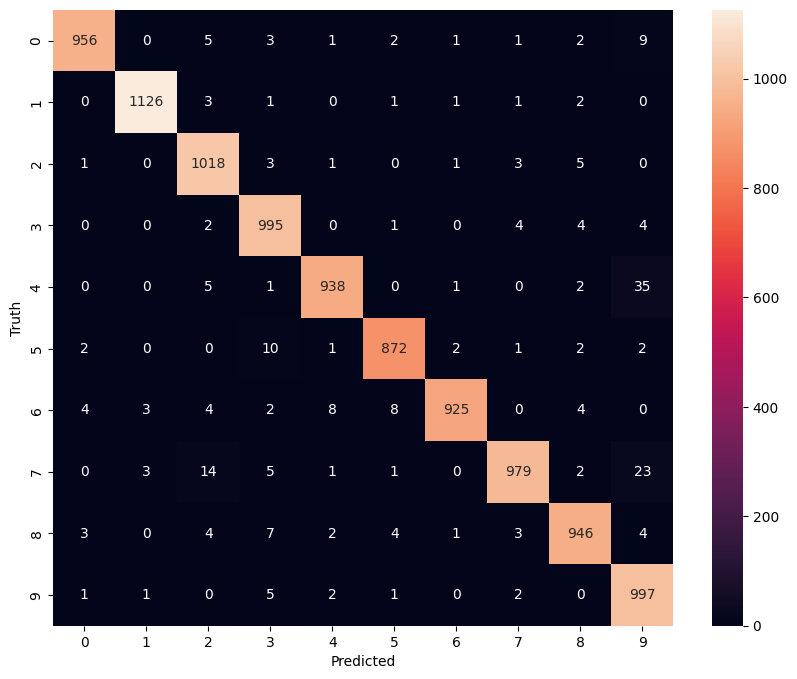

In [36]:
plot_heatmap(cm)